# Simulated Heart Disease Data

***

## Introduction

One of the leading causes of sickness and mortality among the world's population is heart disease.[1] Heart disease is the top cause of death in the United States, according to the Centers for Disease Control and Prevention (CDC). Heart disease is responsible for almost 1 in every 4 deaths in the United States, and it affects people of all genders, races, and ethnicities.[2]

The most common type of heart disease is known as coronary heart disease. It occurs when the arteries that deleiver blood to the heart become blocked with plaque, which contains cholestrol, causing them to stiffen and narrow and as a result of this the blood supply reduces, and oxygen to heart reduces causing the heart muscle to weaken, increasing the chance of heart failure.[3]

Doctors have tried to forecast heart attacks since they first discovered them. However, because of multiple contributing risk factors such as diabetes, high blood pressure, excessive cholesterol, abnormal pulse rate, and many others, it can be difficult to detect cardiac disease.[1] One of the most widely used datasets, the Cleveland Heart Disease dataset from the UCI Repository, is used to simulate and model heart disease. Four variables are investigated with their likely distributions and their relationships with eachother.

## Dataset Source
https://www.kaggle.com/ronitf/heart-disease-uci

## About the Dataset
Although there are 76 attributes in this database, all published studies only use a subset of 14 of them.[4]

Details of the dataset attributes are in the table below:[5]

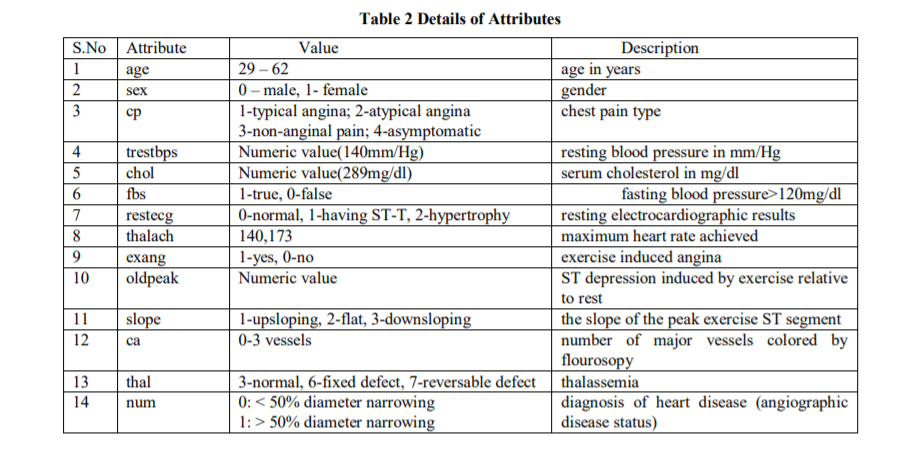

Not all of the characteristics are strongly linked to the prediction. 13 attributes were used (thal, ca, exang, oldpeak, thalach,
cp, slope, sex, age, restecg, trestbps, chol, fbs) to predict heart diseases.[5]



## Exploratory Data Analysis

### Age:
Heart failure affects up to one in every five people at some point in their lives and is linked with significant mortality and morbidity. People aged 65 and over bear the majority of the burden of heart failure.[6]

### Sex:  

Gender is displayed as male (1) and female (0) 

Men have a higher risk of heart disease than women before menopause. It has been claimed that once a woman has through menopause, her risk is similar to that of a man, although more recent data from the WHO and UN contradicts this. A female with diabetes is more likely than a male with diabetes to get heart disease.[7]

### Chest Pain:

Chest pain is divided into four categories. 1. Typical angina 2. atypical angina 3. non-anginal pain 4. asymptomatic.

Angina is chest pain or discomfort caused by a lack of oxygen-rich blood to your heart muscle. Women may have more of a subtle presentation called atypical angina. 
Non-anginal pain or Non-cardiac chest pain (NCCP) is a name for chest pain that resembles heart discomfort (also known as angina) in people who don't have a heart problem.
Asymptomatic heart attacks, also known as silent myocardial infarction (SMI), account for 45-50 percent of cardiac morbidity and even premature mortality in India each year. Males are twice as likely as females to acquire SMI among middle-aged persons. [8]

### Resting Blood Pressure:

High blood pressure (BP) is a major risk factor for cardiovascular disease (CVD), which is the leading cause of death wordwide. High blood pressure is responsible for around 54 percent of strokes and 47 percent of coronary heart disease.[9]

Blood pressure is divided into 4 categories. (Range 110 -180) trestbps[10]
Normal Blood pressure numbers of less than 120/80 mm Hg 
Elevated blood pressure is when readings consistently range from 120-129 systolic and less than 80 mm Hg diastolic. 
Hypertension Stage 1 is when blood pressure consistently ranges from 130-139 systolic or 80-89 mm Hg diastolic. 
Hypertension Stage 2 is when blood pressure consistently ranges at 140/90 mm Hg or higher. 
Hypertensive crisis -This stage of high blood pressure requires medical attention. If your blood pressure readings suddenly exceed 180/120 mm Hg, [10]

High blood pressure, often known as hypertension, is a condition in which the blood pressure is higher than normal. Your blood pressure fluctuates throughout the day depending on what you do. Blood pressure readings that are regularly higher than normal can lead to a diagnosis of high blood pressure (or hypertension) High-cholesterol diet is a common cause of high blood pressure.[11]

If blood pressure is 140/90mmHg or above (or 150/90mmHg or higher if a person is over 80), this indicates high blood pressure.
The optimal blood pressure range is usually between 90/60mmHg and 120/80mmHg.
Readings between 120/80mmHg and 140/90mmHg suggests high blood pressure.[11]

### Cholesterol

The liver manufactures cholesterol and transports it throughout the body to be used in the creation of hormones and cell membranes. Low-density lipoproteins (LDL), also known as "bad cholesterol," are formed as cholesterol is carried through the bloodstream. Although LDL is required in small amounts (LDL transports cholesterol to various parts of the body), a high LDL cholesterol level increases the risk of a heart attack significantly.[11] Fatty deposits develop in blood vessels if there is high cholesterol. These deposits eventually accumulate to the point where blood flow through your arteries is restricted. Those deposits can sometimes rupture and form a clot, resulting in a heart attack or stroke.[11] When total cholesterol levels reach 240 mg/dl or above, the risk of cardiovascular disease rapidly increases. A good cholestrol level is less than 200 mg/dl total cholesterol.There's a sharp increase in the risk for cardiovascular disease when total cholesterol levels are 240 mg/dl and above. Mortality from stroke is lowest when cholesterol levels are between 180 and 200. Below 180, mortality skyrockets, and above 240, mortality skyrockets. Death rates are highest below 160 and highest above 300.[12] High cholesterol and heart disease are more common in males 45 and women 55 years old. 

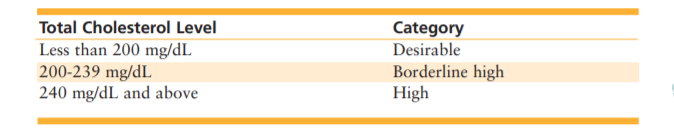  https://www.nhlbi.nih.gov/files/docs/public/heart/wyntk.pdf


### Fasting Blood Pressure

Insulin is a hormone produced by the pancreas that aids in the conversion of glucose to energy. The carbohydrates in a person's diet are turned into glucose, often known as blood sugar, after food is consumed. The pancreas can still create insulin in type 2 diabetes, but that insulin becomes less effective at transporting glucose into cells. [13] 
Diabetes patients are more than twice as likely to die from heart disease or have a stroke. While all diabetics have an elevated risk of heart disease, type 2 diabetes patients are more likely to acquire the condition. Fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates prediabetes, and 126 mg/dL or higher indicates diabetes. Males are more likely than women to develop type 2 diabetes as they are genetically predisposed to it. Men need to acquire considerably less weight than women to develop the illness.[13]

### Resting ECG

A resting ECG differs from a stress or activity ECG, as well as a cardiac imaging exam. Risk factors for heart disease, such as high blood pressure, or symptoms like palpitations or chest pain,suggest an ECG test is needed.[14]

### Maximum heart rate achieved

The maximum rate is calculated by subtracting a persons age from 220. The maximum heart rate for a 50-year-old is 220 minus 50, or 170 beats per minute. The aim would be 50 percent of that maximum, or 85 beats per minute, at a 50 percent exercise level. The goal heart rate would be 145 beats per minute at an exercise level of 85 percent. As a result, a 50-year-ideal old's heart rate during activity should be between 85 and 145 beats per minute.[15]

### Exercise Induced Angina

Angina is chest pain that occurs as a result of exercise, stress, or other factors that cause the heart to pump harder. It's a very prevalent sign of coronary artery disease, which is caused by clogged coronary arteries with cholesterol. This is the artery network that feeds the heart muscle.[16]

### Thalassemia

Thalassemia is a genetic blood condition in which the body produces much less hemoglobin than it should. Hemoglobin is a protein that allows red blood cells to transport oxygen. Thalassemia can induce anemia, which might make someone tired. Severe anemia can cause organ damage and even death.[17]

## Libraries

In [1]:
import pandas as pd
import sklearn.model_selection as mod

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#import scipy.stats as ss
#import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score


## Data

In [2]:
# Load the Health dataset csv file to a pandas dataframe
heart_data = pd.read_csv("HealthData.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [5]:
# Identify missing values in each column
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Statisical Information about the dataset
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Simulating Data 

The creation of random numbers from a stochastic process (a collection of random variables) specified by a series of distributional statements is simply referred to as data simulation. Simulating Data is a statistical approach for aggregating data from multiple clinical trials to produce a quantitative estimate of the overall effect of a certain intervention or variable on a given outcome.[18]

## Types of data and effect measures

Identifying the data type for the outcome measurements is a critical first step in analyzing the outcomes of effectiveness studies. There are 4 possibel outcomes. [19]
1.data that is dichotomous (or binary), whereby each individual's outcome is one of just two categorical outcomes.
2.Continuous data involves each individual's outcome being a numerical quantity measurement.
3.ordinal data (including measurement scales), in which each person's outcome is one of several ordered categories, or derived by scoring and summing categorical replies;
4.counts and rates calculated from counting the number of events experienced by each individual

## Effect Measures:

Statistical constructs compare outcome data between two intervention groups as effect measures. Probabilities ratios (which compare the odds of an event between two groups) and mean differences are two examples (which compare mean values between two groups).[19]

In randomized trials, one of the most fundamental principles is that the analysis must take into consideration the amount of randomization. In most cases, the number of observations in the analysis should equal the number of randomized 'units.'

## Classifying Data Points

Individual data points can be classed as belonging to one of several statistical data categories in statistics, such as categorical data ("red", "blue", "green")[20] The data type determines which types of probability distributions can logically be used to represent the variable, the operations that can be performed on the variable, the type of regression analysis that can be used to predict the variable, and so on.[20]
The concept of data type is comparable to that of measurement level, however it is more specific: Count data, for example, require a different distribution (e.g., a Poisson or binomial distribution) than non-negative real-valued data, but both are measured at the same level (a ratio scale).[20]

## Level of Measurement
The nature of information within the values assigned to variables is described by the level of measurement or scale of measure, which is a categorization. [21] Stanley Smith Stevens, a psychologist, created the most well-known classification with four levels of measurement, or scales: nominal, ordinal, interval, and ratio.[21]

Simple data types are categorised, as well as their associated distributions, permitted operations, and so on. Because the theory of random variables typically explicitly assumes that they hold real numbers, all of these data types are generally coded using real numbers.[20]

## Random number generators in numpy
Random numbers are generated from the normal distrbution. numpy.rand produces random numbers from a random uniform distribution (2 and 3 dimensional arrays)
Choice - generates a random number from a 1D array[24]

To make sure the same results occur each time, a random seed is set using reproducbe code. ie whenever the code is run the code gets the same values as the previous user.
np.random.seed results in the same values returning each time.[24]

100 training samples corresponding to two features
Y = np.random.rand(100, 2)

### Age
Age is a count data type. Count data is statistical data in which the observations can only take the counting numbers, non-negative integer values 0 through 1, 2, 3, and so on, and where the integers come from counting rather than ranking.[22] A count variable is a term used to describe a single item of count data. The normal distribution, binomial, and negative binomial distributions are often employed to illustrate the distribution of such a variable when it is handled as a random variable.[22]It has a ratio scale. The ratio type is named by the fact that measurement is the estimation of the ratio between a continuous quantity's magnitude and a unit of measurement of the same sort. Mass, length, duration, plane angle, energy, and electric charge are some examples. Ratios, unlike interval scales, can be compared by division. Many ratio scales can be loosely defined as indicating "how much" of something (i.e. an amount or magnitude). When expressing an order of magnitude, such as temperature in orders of magnitude, a ratio scale is frequently employed.[23] The most typical ratio scale variables are age, money, and weight. For instance, if you are 50 years old and your child is 25, you may confidently declare that you are twice their age. Understanding the various measurement scales allows you to see the various types of data you can collect.[23]

## Normal Distribution 

    numpy.random.normal
    
This function uses normal distribution, otherwise known as a bell curve, to select samples. 
The probability density function of the normal distribution was initially computed by De Moivre and later by both Gauss and Laplaceis. Its commonly referred as the bell curve because of its shape.[23]

In nature normal distributions are common. It represents for example the observed distribution of samples altered by 
by a large number of small random disturbances, each having its own unique distribution.

A normal (or Gaussian, Gauss, or Laplace–Gauss) distribution is a type of continuous probability distribution for 
a real-valued random variable in probability theory. The probability density function uses the following formula.[23]

![formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/00cb9b2c9b866378626bcfa45c86a6de2f2b2e40)

The parameter mu represents the distribution's mean or expectation, whereas sigma represents its standard deviation. 
The distribution's variance is v. A normal deviate is a random variable that has a Gaussian distribution and is normally distributed.[23]

[60.73365301 68.10045659 33.40357993 66.10859207 46.34806559 71.88691399
 65.49635625 49.40664102 77.11042307 63.81377217 58.39755436 59.25859555
 52.35123024 66.80465805 50.59979705 56.49880071 45.27634813 57.42249693
 54.30362547 60.17955058 39.80345005 48.85438561 51.80128241 67.75067286
 50.97583879 54.43007254 67.28168326 67.93806449 59.14327555 55.35532703
 44.20923574 66.67088821 70.23035513 48.82878324 55.59250972 49.8004497
 44.14093059 59.80880283 50.49636091 46.95607783 63.04105905 36.4465006
 56.2566581  53.71629235 52.73357642 52.26884371 58.07362875 44.98873767
 51.94846793 38.97649744 48.19131845 49.6468682  56.82718061 46.95373416
 51.20912752 50.67196262 64.16698462 49.84206442 57.86257206 53.74602165
 67.40198768 59.87276328 50.69184445 47.8367013  50.78905906 47.27401297
 47.87080177 52.79431895 59.62779365 70.26380963 55.55268398 38.33090413
 55.45877955 46.20041329 52.12569784 58.43491232 46.38795483 57.4609668
 45.0025982  63.24235085 57.10161356 42.64195316 62.40

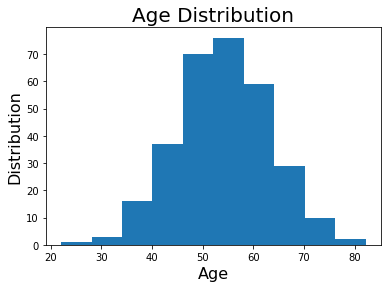

In [7]:
#Age - Normal Distribution

np.random.seed(0)
np.random.rand()

mu, sigma = 54, 9.08 # mean and standard deviation

age_data = np.random.normal(mu, sigma, 303)
age_data
print(age_data)
# Displaying Data
plt.hist(age_data)


plt.title('Age Distribution', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Distribution', fontsize=16)

plt.show()


## Sex
Sex is a binary data type as the output is either 'Yes' or 'No', that is, male or female.[28] It has a nominal scale. The nominal type distinguishes items or topics solely on the basis of their names, (meta-)categories, and other qualitative classifications to which they belong. The variables may be represented by numbers, but the numbers have no numerical value or relationship: for example, a globally unique identity.[28] A binary variable is a sort of random variable that has two possible values. A binomial distribution is used to describe the total counts of binary variables, or variables that are coded as 1 or 0.[28] 

#### Binominal Distribution

The discrete probability distribution of the number of successes in a series of n independent experiments, each asking a yes–no question and each with its own Boolean-valued conclusion, is the binomial distribution with parameters n and p.[28]

    numpy.random.binomial(n, p, size=None)

This function uses binomial distribution to select samples. Samples are taken from a bionomial distributuion with given parameters. n means number of trials/atttempts, p represents probability of succcess, and n must be an integer and greater or equal to 0. p must be in the interval of 0 to 1 [23]



[6 5 5 5 6 5 7 8 5 6 5 5 7 3 3 2 7 6 7 8 6 5 6 3 6 3 7 5 5 4 6 5 5 2 5 5 5
 7 6 4 5 6 3 6 6 4 3 4 4 5 5 8 3 4 3 6 4 5 4 3 3 6 3 4 4 6 3 7 3 8 5 8 5 6
 2 4 3 4 3 4 5 3 6 5 4 5 3 5 7 4 6 3 6 4 4 5 2 7 1 6 4 6 8 4 5 5 5 4 8 5 7
 6 4 6 5 7 5 7 6 6 5 8 6 5 5 2 4 6 4 5 5 3 4 5 5 5 6 6 5 7 4 5 7 6 6 3 7 6
 9 3 7 3 5 3 7 6 5 5 3 6 5 6 7 8 7 2 4 6 3 5 2 4 2 6 4 4 7 6 2 3 5 5 4 7 5
 5 5 6 4 5 4 4 7 6 5 4 4 3 5 4 6 5 4 2 3 6 5 5 7 9 4 6 4 2 6 4 5 5 7 6 7 4
 6 4 8 6 4 8 6 4 4 5 2 4 5 4 5 4 5 7 3 5 3 6 5 5 4 3 5 4 7 6 6 7 3 5 5 8 4
 4 3 2 7 6 6 4 5 3 5 8 7 4 8 4 8 7 6 6 7 4 7 5 2 4 3 8 5 5 6 4 3 6 4 5 4 3
 7 8 8 7 6 4 3]


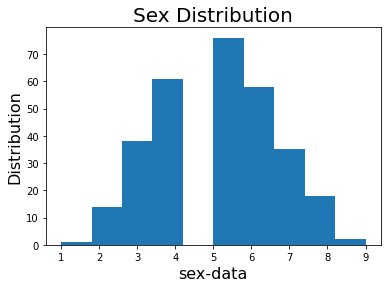

In [8]:
#Sex - Binominal Distribution

np.random.seed(0)
np.random.rand()

n, p = 10, .5  # number of trials, probability of each trial
sex_data = np.random.binomial(n, p, 303)
print (sex_data)

# Displaying Data

plt.hist(sex_data)

plt.title('Sex Distribution', fontsize=20)
plt.xlabel('sex-data', fontsize=16)
plt.ylabel('Distribution', fontsize=16)

plt.show()

## Chest Pain Type 

Chest Pain Type is a categorical data type. A categorical variable, also known as a qualitative variable, in statistics is a variable that has a finite number of possible values, allocating each human or other unit of observation to a specific group or nominal category based on some qualitative attribute. [23]  A categorical distribution is the probability distribution associated with a random categorical variable. When it comes to data analysis, the word "categorical data" refers to data sets that contain both categorical and non-categorical variables.[23] Similiar to the sex variable , it has a nominal scale. Numbers may be used to represent variables, but they have no numerical value or relationship.

### Discrete Probability Distribution

A discrete probability distribution counts events with finite outcomes. A continuous distribution, on the other hand, allows outcomes to fall anywhere along a continuum.
A probability distribution will return a number based on the relative weights for a number chosen at random. For example, a number chosen from the range [1, 2] with relative weights of [.9,.1] has a 90% chance of being 1 and a 10% chance of being 2.[27] To pick a random number from a population depending on the probability distribution weights, use random.choices(population, weights). The weights are relative, which means that the percentage of each number chosen is determined by the sum of the weights.[27] random.choices() is used to select a random number. 

numpy.random.choice

It creates a random sample from a one-dimensional array.[28]

[2 2 2 1 2 1 3 4 1 2 2 2 4 1 1 1 3 2 3 4 2 1 2 1 2 1 4 2 1 1 2 1 2 1 2 2 2
 4 2 1 1 2 1 2 2 1 1 1 1 2 1 4 1 1 1 2 1 1 1 1 1 2 1 1 1 3 1 3 1 4 1 4 2 2
 1 1 1 1 1 1 1 1 2 2 1 2 1 2 4 1 2 1 2 1 1 2 1 3 1 2 1 2 4 1 2 2 2 1 4 1 3
 2 1 3 1 3 2 3 2 2 2 4 2 1 2 1 1 2 1 2 1 1 1 2 2 2 2 2 1 3 1 1 3 3 2 1 4 2
 4 1 3 1 2 1 3 3 2 1 1 2 1 2 3 4 3 1 1 2 1 2 1 1 1 2 1 1 4 2 1 1 2 2 1 4 2
 2 2 2 1 1 1 1 4 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 3 4 1 2 1 1 2 1 1 2 3 2 3 1
 2 1 4 2 1 4 2 1 1 2 1 1 1 1 1 1 2 3 1 2 1 2 1 2 1 1 1 1 4 2 2 4 1 2 2 4 1
 1 1 1 4 2 2 1 2 1 1 4 3 1 4 1 4 4 2 2 3 1 3 2 1 1 1 4 1 1 2 1 1 3 1 2 1 1
 3 4 4 4 2 1 1]


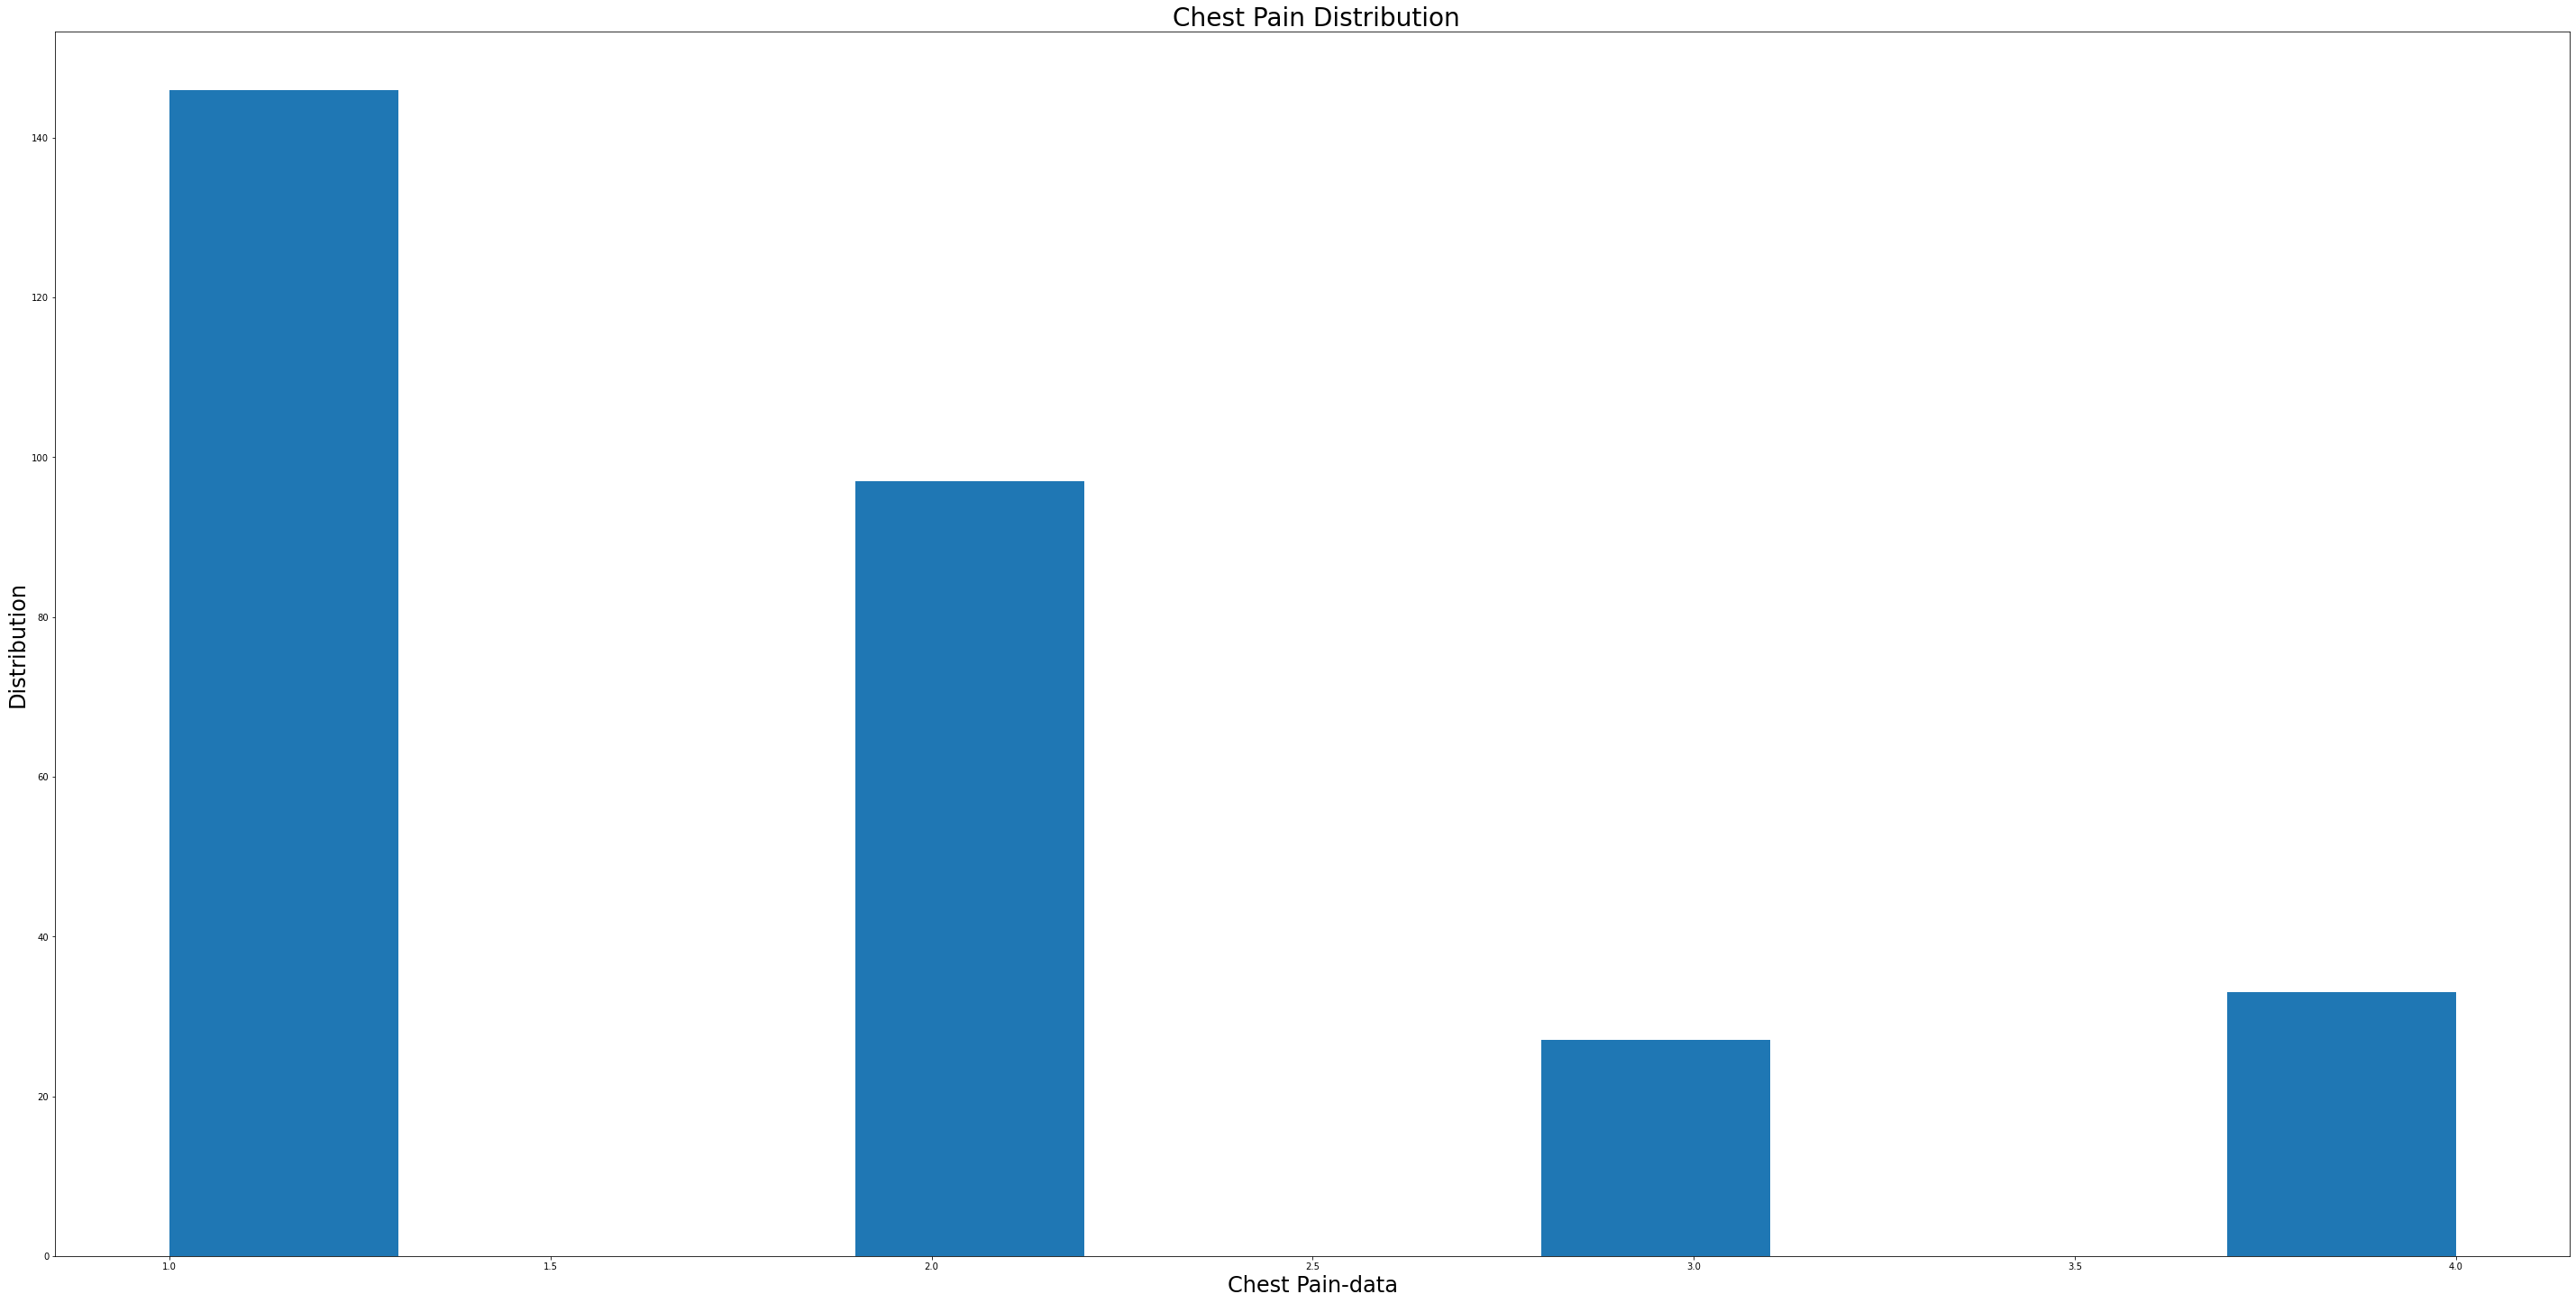

In [35]:
from random import choice

np.random.seed(0)
np.random.rand()

chest_data = np.random.choice(  
a=[1, 2, 3, 4],  
size=303, 
replace=True,
p=[0.5, 0.3, 0.1, 0.1 ]  )

print(chest_data)

plt.hist(chest_data)

plt.title(' Chest Pain Distribution', fontsize=28)
plt.xlabel('Chest Pain-data', fontsize=24)
plt.ylabel('Distribution', fontsize=24)

plt.show()

## Cholesterol

Like the age variable, cholesterol is a Count Data Type and it has a ratio scale.        [22]

### Poisson Distribution

In probability theory and statistics, the Poisson distribution named after French mathematician Siméon Denis Poisson, is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume. [23]

[256 248 253 241 247 274 220 263 261 260 252 279 242 259 249 251 251 254
 243 214 254 225 240 243 222 228 234 234 223 226 240 222 222 245 251 205
 225 224 242 255 235 221 275 254 256 230 235 288 249 249 283 264 236 241
 250 255 246 253 251 237 236 243 236 250 253 243 240 269 256 273 266 251
 264 249 217 244 265 240 229 212 232 275 199 251 251 250 237 232 279 246
 234 243 255 230 216 244 232 235 258 241 263 267 261 257 232 243 244 250
 224 226 241 230 245 278 220 250 236 222 275 260 250 245 267 287 261 267
 264 245 252 226 230 232 259 219 233 212 227 221 234 249 257 226 237 244
 255 240 260 255 260 240 235 231 218 237 246 254 225 284 270 244 244 241
 255 238 252 228 286 250 244 249 271 228 241 243 264 286 239 230 275 279
 244 233 200 243 234 234 251 228 216 236 253 254 243 236 242 209 239 270
 223 233 214 268 240 258 229 237 233 279 258 244 236 242 251 248 250 242
 235 241 246 240 258 274 210 244 239 254 256 239 267 236 256 240 273 242
 239 235 224 255 281 253 250 262 238 222 247 221 24

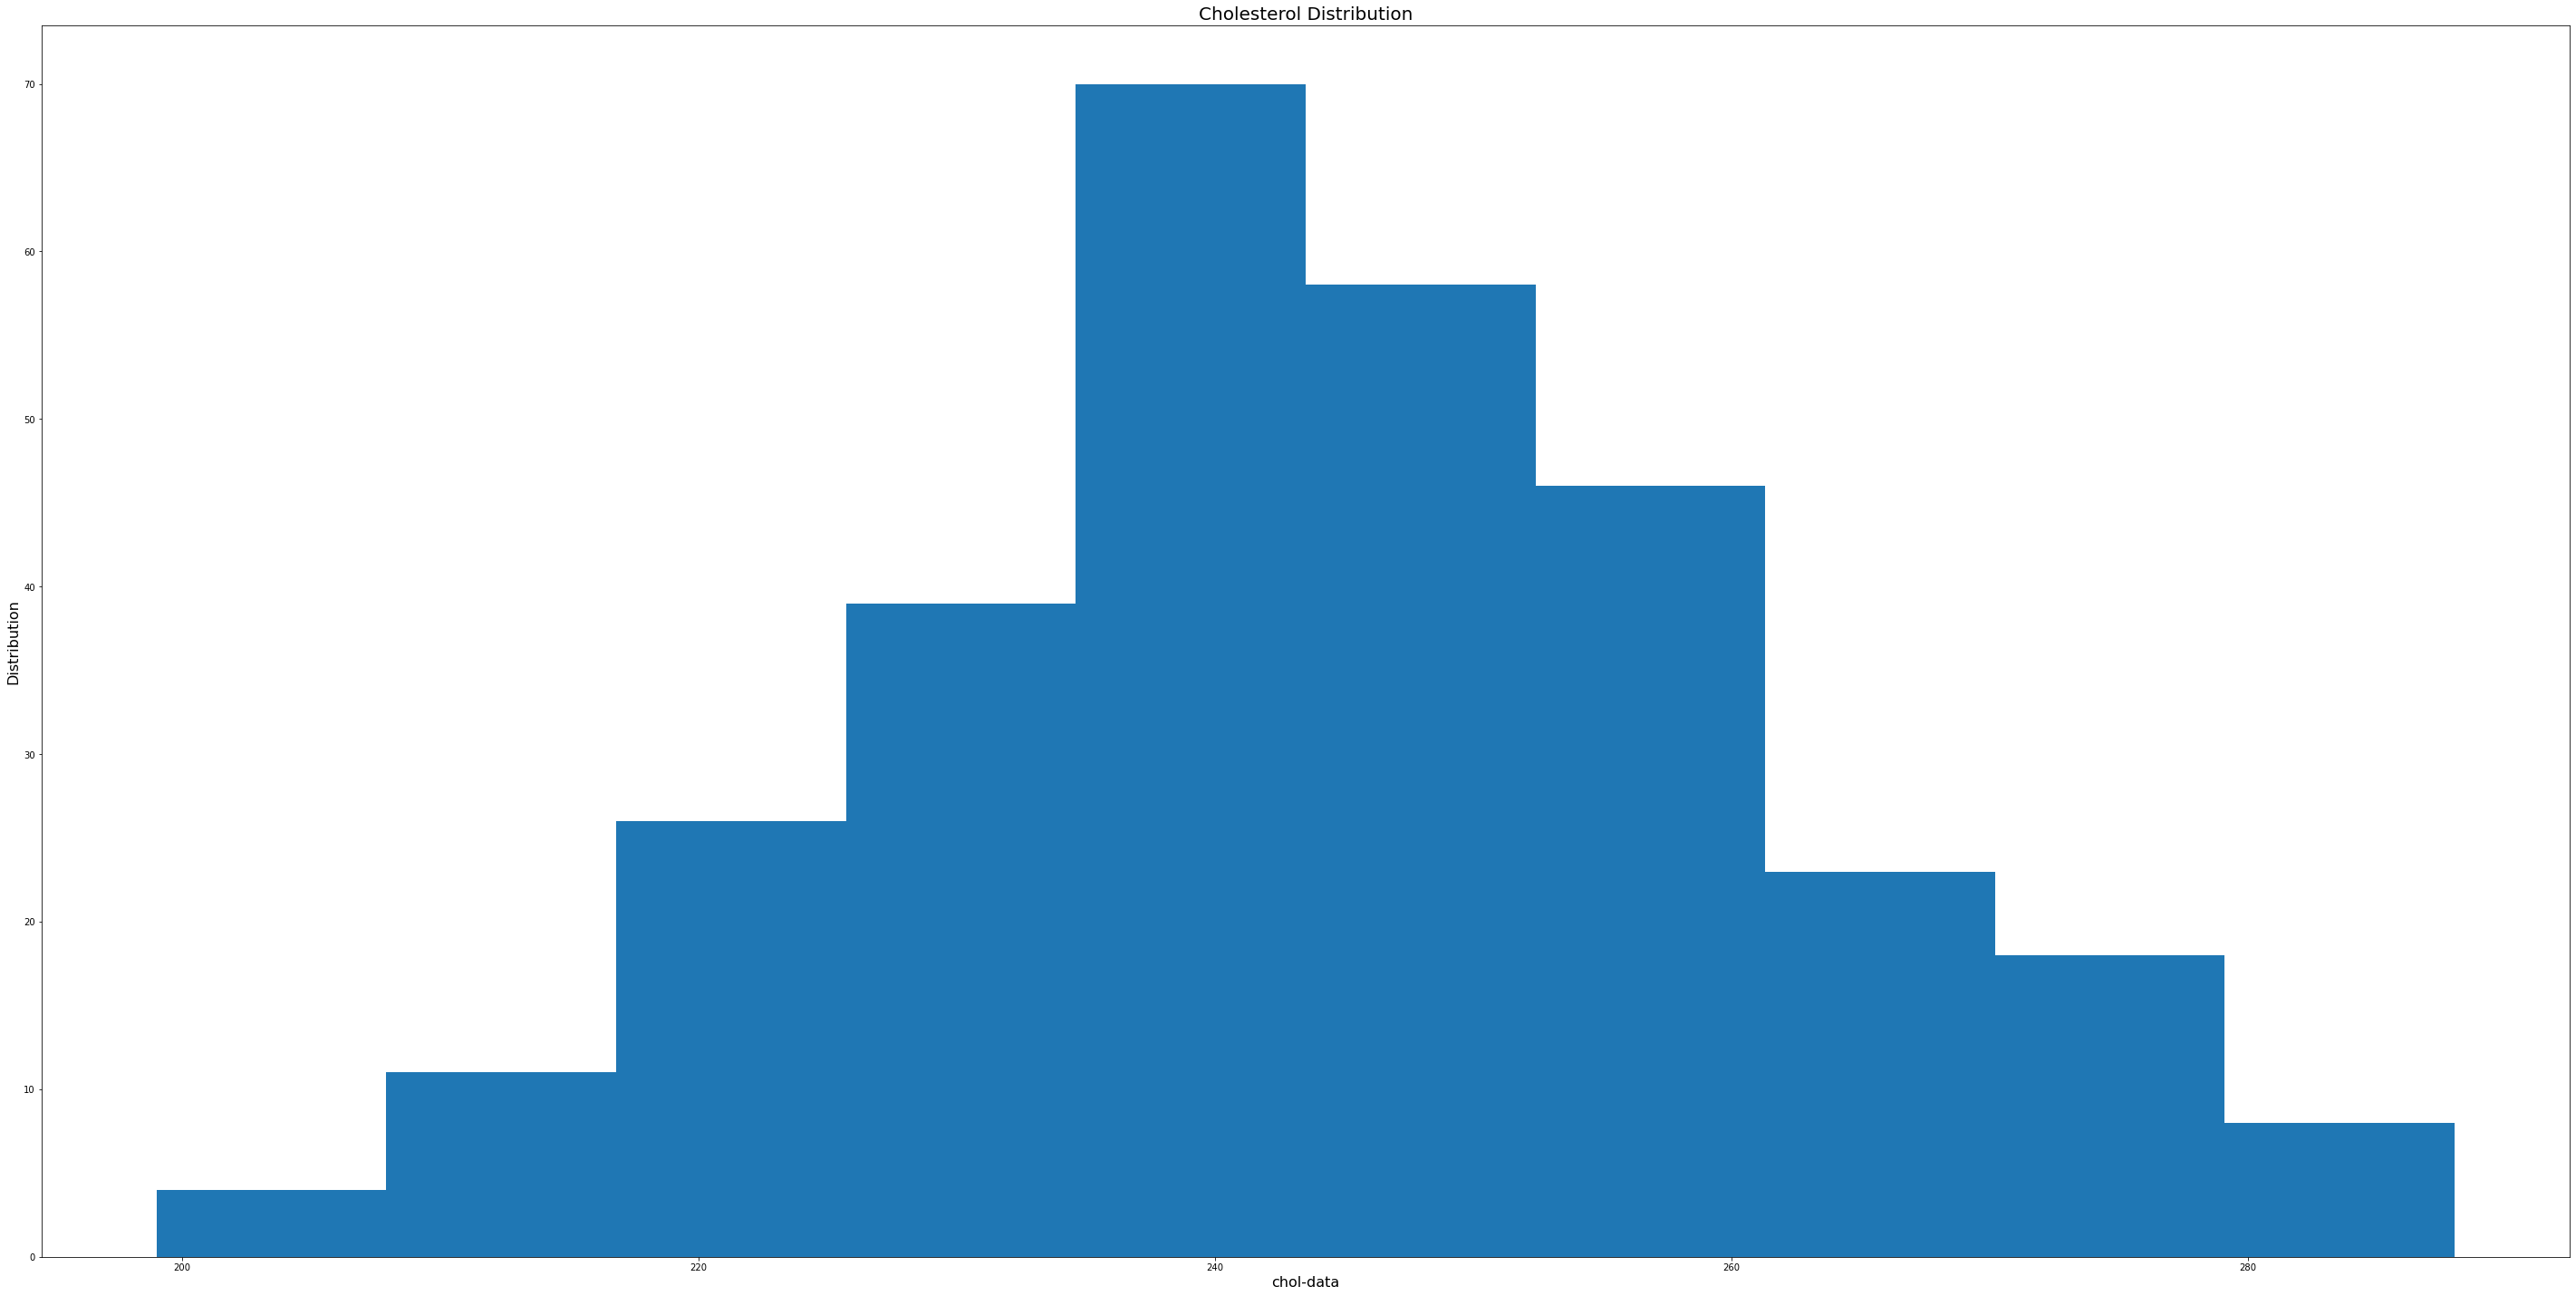

In [37]:
np.random.seed(0)
np.random.rand()


chol_data = np.random.poisson(lam=(246), size=(303))
print(chol_data)

plt.hist(chol_data)

plt.title('Cholesterol Distribution', fontsize=20)
plt.xlabel('chol-data', fontsize=16)
plt.ylabel('Distribution', fontsize=16)

plt.show()

## Diagnosis of Heart Disease 

Like sex, the diagnosis of Heart Disease is a binary data type. Also, a binomial distribution is used to describe the total counts of binary variables.

[ 7  4  8  5  6  5  6  7  9  5  4  6  7  8  8  7  7  6  8  8  4  7  5  4
  6  7  7  6  5  6  4  4  3  8  3  6  4  5  2  4  6  5  6  6  6  5  5  6
  5  7  7  8  2  9  7  5  8  4  5  3  5  6  5  3  5  6  4  6 10  7  6  4
  6  6  6  4  3  2  6  3  4  5  7  7  7  3  6  6  5  4  4  7  6  4  4  7
  7  6  8  6  7  5  7  5  7  2  3  6  7  7  6  8  5  6  6  4  5  3  6  3
  4  6  5  6  4  7  7  7  6  4  5  6 10  6  8  7  3  7  4  4  7  5  7  4
  5  4  6  3  8  6  5  6  7  7  4  6  4  4  6  6  5  4  4  9  5  3  5  7
  6  7  6  3  3  6  6  5  3  7  6  4  5  3  7  5  6  6  6  6  6  3  4  4
  6  5  4  4  6  4  4  7  4  6  6  6  5  5  5  4  5  6  6  4  6  7  8  4
  3  7  6  7  7  3  8  2  7  4  5  6  6  4  6  5  5  6  3  5  4  5  8  4
  7  3  8  6  7  6  4  6  7  6  4  7  7  8  5  6  6  5  6  4  4  7  2  7
  6  7  6  6  5  4  4  7  5  7  6  6  6  6  4  8  4  4  7  3  5  0  7  5
  6  6  5  3  4  5  5  3  5  4  4  7  4  9  6]


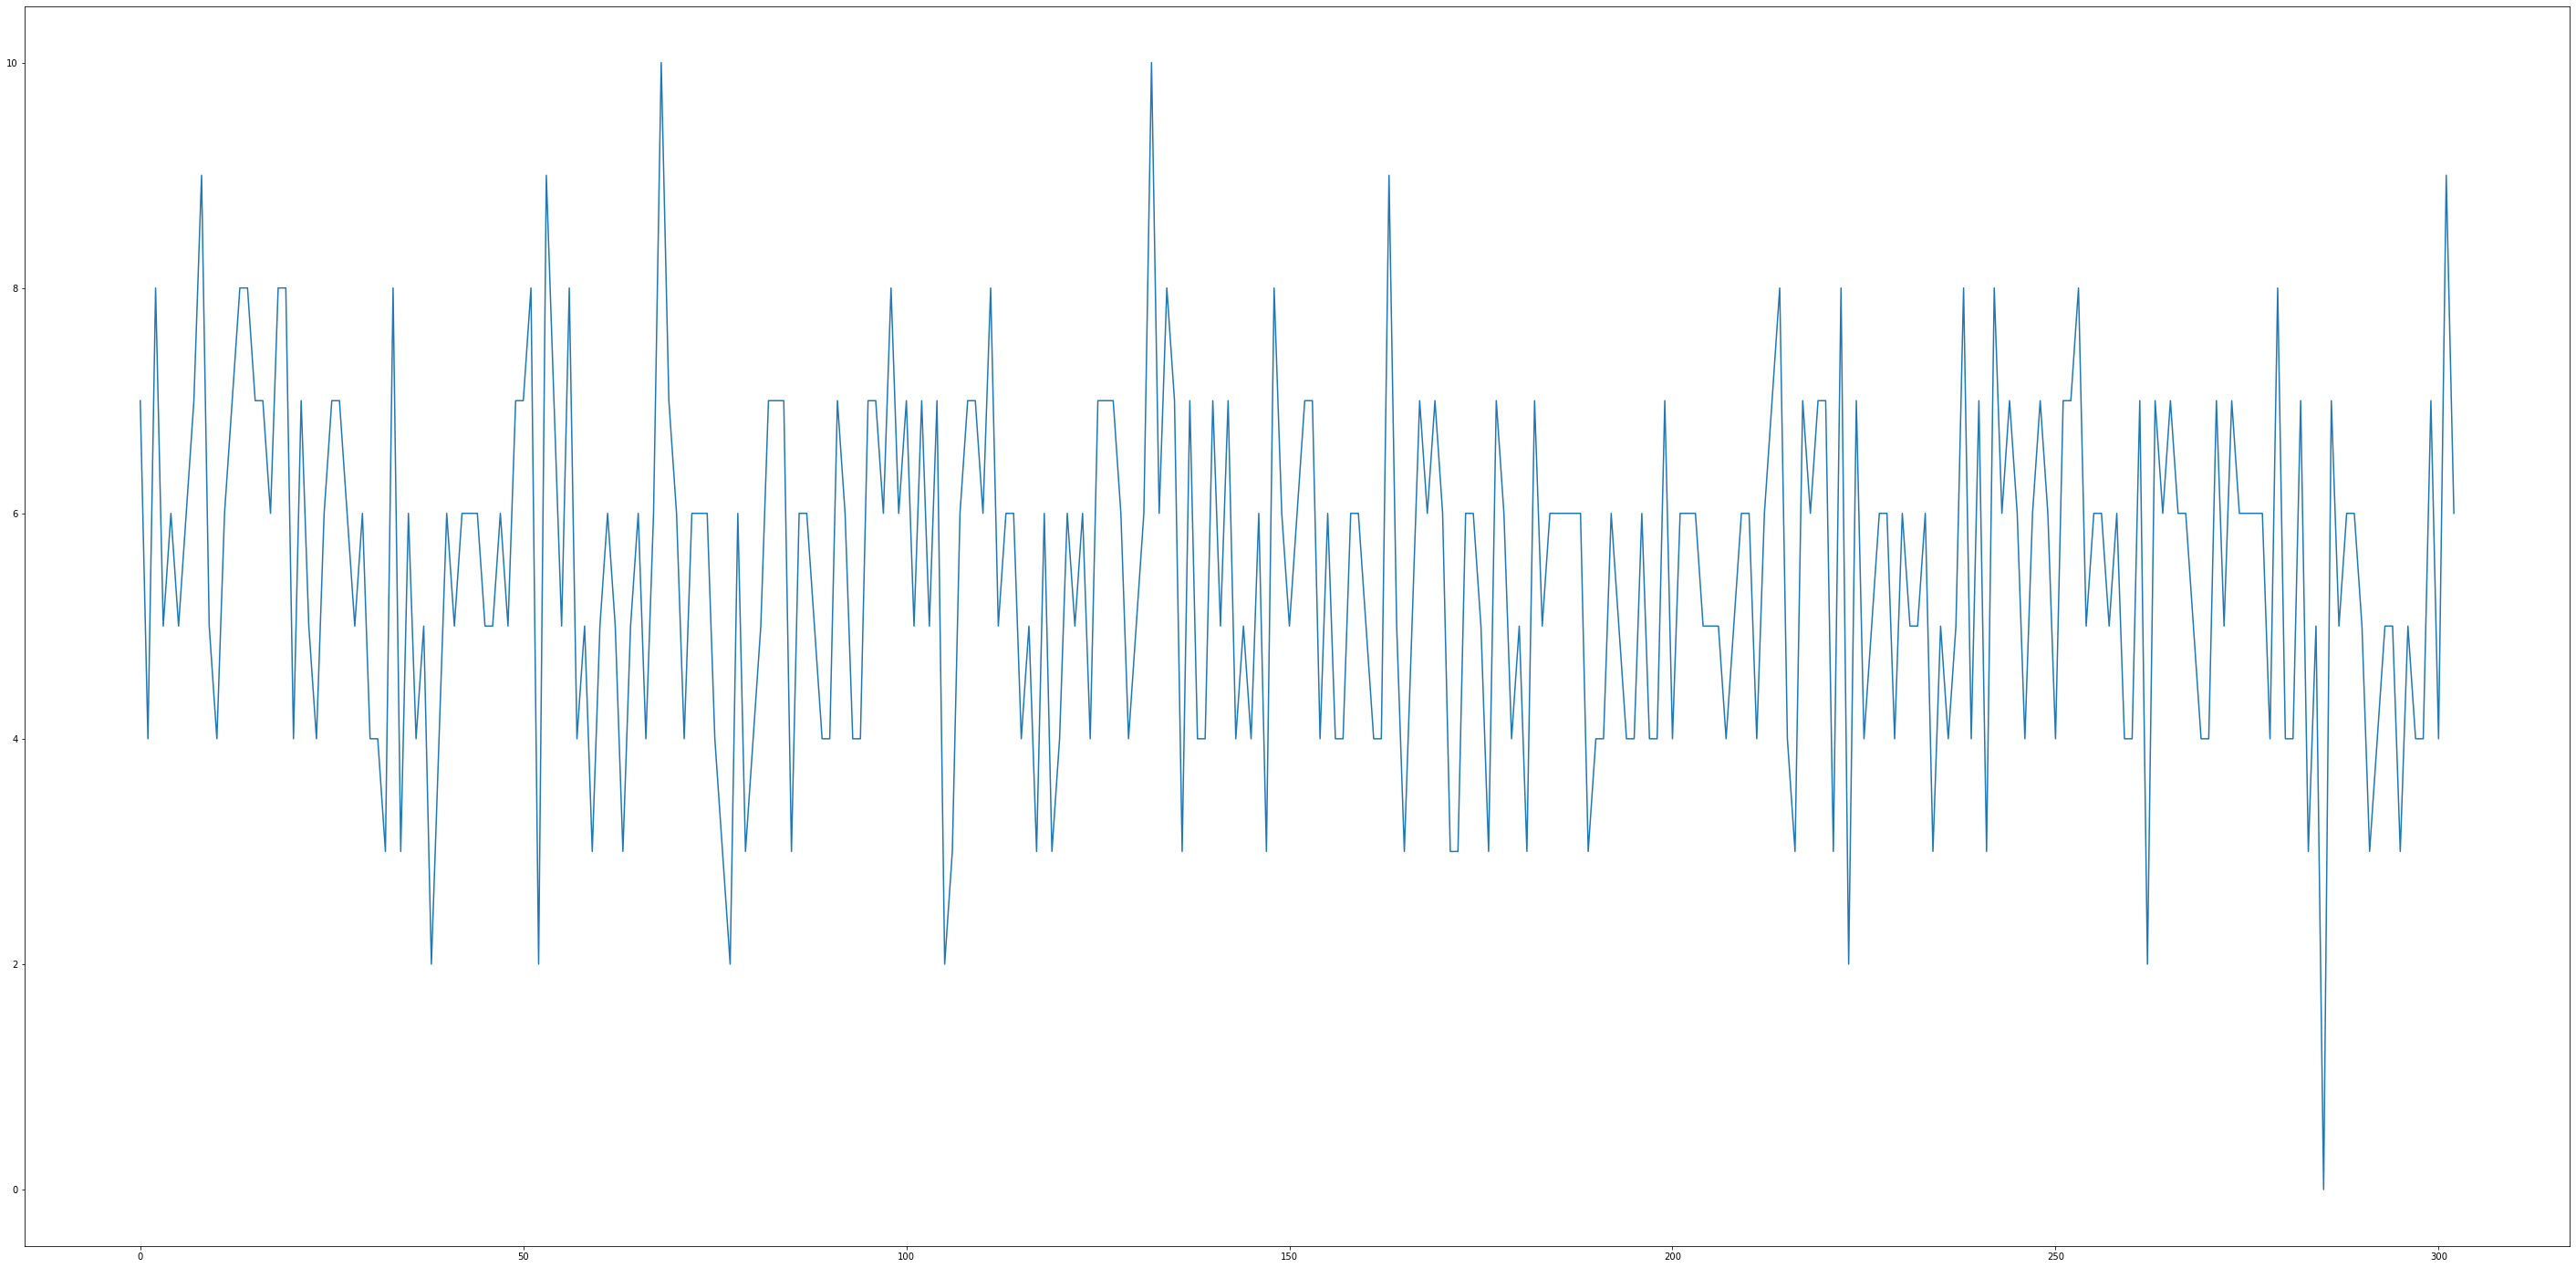

In [12]:
n, p = 10, 0.544554  # number of trials, probability of each trial
heart_disease = np.random.binomial(n, p, 303)
print (heart_disease)

# Displaying Data

plt.plot(heart_disease)
plt.show()

## Comparing two variables - age and cholesterol

Age and cholesterol are compared. From the chart below, the people between the age of 35 and 65 have a high chance of getting heart disease. Under 35's have normal cholesterol levels. 69 appears to be an outlier as it doesn't make sense in this chart.

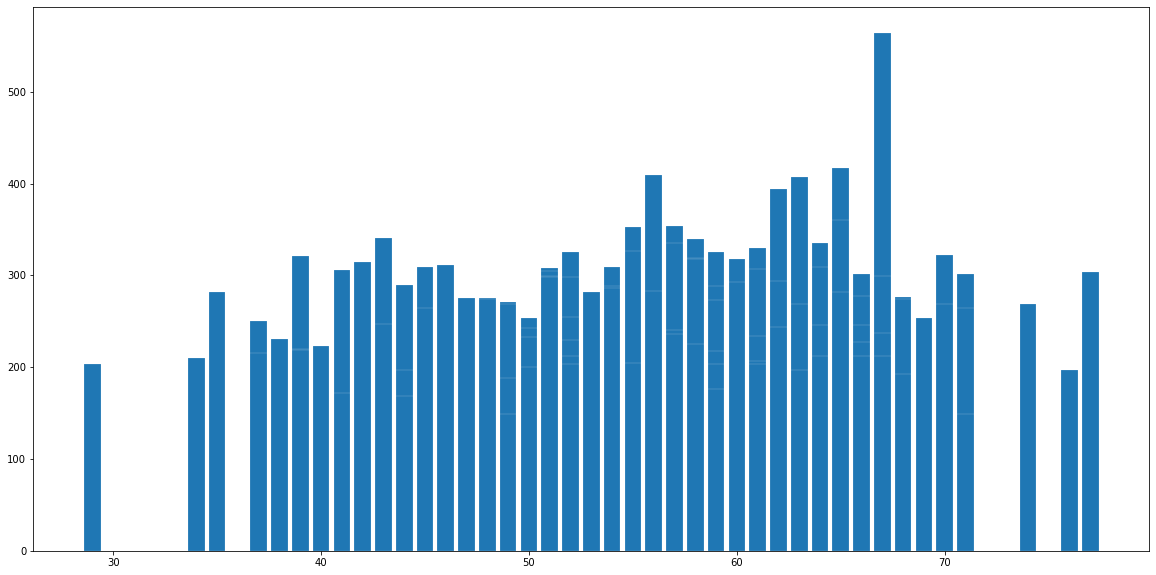

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(heart_data.age,heart_data.chol, edgecolor='white', linewidth=0.17)
plt.show()

# Correlation using a correlation heat map

The correlation of two variables is the statistical relationship that exists between them. A positive correlation means that both variables move in the same direction, while a negative correlation means that when one variable's value rises, the other variable's value falls.[30]
To analyze data sets having more than two observations for each 'person' or'site,' the simplest strategy is to investigate all potential two-way comparisons. Its possible to generate a big matrix of correlation coefficients that may be sifted through to locate the most significant positive and negative numbers for further research.[23]
Hypothesis testing is the cornerstone of scientific analysis. Practically every statistical test is used to determine the likelihood that a hypothesis is right. If the likelihood is low, the hypothesis is declared erroneous and is rejected in favor of a different hypothesis. The null hypothesis states that nothing is happening.[23] A statistical test is used to determine the likelihood of the null hypothesis being true. The alternative, or more interesting hypothesis is accepted if the null hypothesis is rejected.[23] If the null hypothesis is true, the p value represents the chance of seeing data this severe or more extreme. So, assuming the null hypothesis is true, a P-value of 0.06 suggests that you have a 6% chance of seeing data like this.[23] It is common to choose a number of 0.05 or 5% as the crucial level for rejecting a hypothesis. This indicates that if a theory has a likelihood of being true of less than one in twenty, it will be rejected. Low P-values reject the null hypothesis and accept the more interesting alternative hypothesis.

The heat map below, highlights all the correlations between all the given variables. It creates a visualisation of the correlations. Blue represents a positive correlation and red represents a negative correlation. Any negative correlation means it is unlikely that a person will get heart disease based on the target variable because the result is nearer to 0. Anything less than 0.05 is significant. If the variable is not significant it is rejected. Chest pain and cholesterol results in a correlation coefficient of -0.077, which means that there is no correlation between chest pain nd cholesterol. Significant variables on the correlation matrix include thalach and slope which is 0.39 The strong correlation between these two variables suggets that a maximum heart rate is strongly related to the ST segment which is a predictor of cornory heart disease. This makes sense that they should be positively correlated 0.42 as there is a strong correlation between a maximum heart rate and the target variable which is the heart disease variable. 

The .corr creates the correlation matrix between all the features that are examined and the y-variable.[31] mask is used to exclude duplicate correlations. It filters them into an array. [32]

<ipython-input-30-122c34cae3df>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

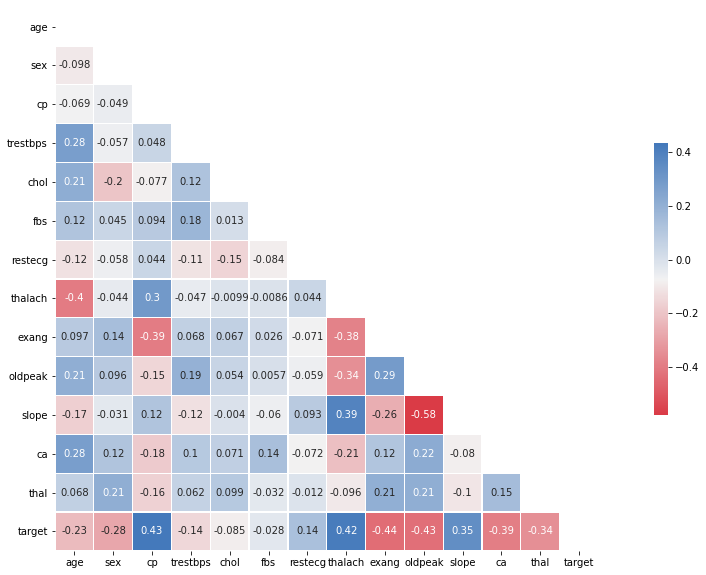

In [30]:
corr = heart_data.corr()
corr
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 250, as_cmap=True)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=0.2, cbar_kws={'shrink': 0.5}, ax=ax, annot=True)


# Machine Learning 

Machine Learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence (AI) based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention.[33]

Machine Learning involves 'training' the model, which includes using a subset of a dataset, in which the performance of the model is unknown until it is 'tested' on additional data that was not available during training, referred to as the test set. In this situation, the goal of machine learning is to achieve the best results on the test set.[33]
The goal of (supervised) machine learning is to create a model that can generate accurate predictions over time. Machine learning is all about results, ie the output.  Statistical modeling, on the other hand, is more concerned with identifying correlations between variables and their significance, but it can also make predictions.[34]

The generated data can be utilised to train the Machine Learning model of choice to make predictions in the real world after many different simulations have run and tested all of the different conceivable situations. [35]

Initially, it is assumed that there is a null hypothsis, which is an initial statement in Machine Learning that claims there is no association between two measured events. However, an alternative hypothesis can be accepted meaning that the data is drawn from a distribution that is different to it. To begin a statisical text, data such as a sex distribution is needed to compare against something. Then sample data such as cholesterl can be used to compare to sex. There is a probabilty threshold that determines when you reject the null hypothsis - p values.

# Identify the Distribution of the Target Variable

165 people have a heart defect (1) and 138 people have a healthy heart (0). These results almost have an equal distribution between the two classes. 

In [15]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [16]:
# Splitting the features and target

The target variable is split from all the other variables, to predict an outcome as to whether people will have a heart defect or not. All the variables such as age, chest pain etc are used to determine what the target will be. The target variable is removed from the dataframe and stored elsewhere. Two variables are created. All the features are stored in variable X (the target column is dropped from this variabel) and the target is stored in variable Y

In [17]:
X = heart_data.drop(columns='target', axis=1)

Y = heart_data['target']

In [18]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [19]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# Split data into training and test data

Four variables are created - X_train, X_test, Y-train, Y_test.  The X and Y variables are both split into X and Y test and train data. Test size is the % of the test data required in this case 20% of the data. Stratify=Y distributes the values 0 and 1 evenly. 
The mean values change, that is, the data is split each time the mean function is run. To prevent this, and get the same split each time, the parameter Random State is used to specify the random state instance.

It returns the number of data points in each array. X.shape is the original data. Training data is 80% of the data and 20% is test data.

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [21]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.351932
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.489     
Dependent Variable: target           AIC:              239.2711  
Date:               2021-12-30 12:51 BIC:              287.5496  
No. Observations:   303              Log-Likelihood:   -106.64   
Df Model:           12               LL-Null:          -208.82   
Df Residuals:       290              LLR p-value:      4.0884e-37
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0128    0.0191   0.6701  0.5028  -0.0246   0.0501
sex           -1.6381    0.4519  -3.6250  0.0003  -2.5237  -0.

In [22]:
X = heart_data.drop(columns=['target', 'age', 'trestbps', 'chol', 'restecg', 'fbs', 'slope'], axis=1)

In [23]:
X.head(5)

,sex,cp,thalach,exang,oldpeak,ca,thal
0,1,3,150,0,2.3,0,1
1,1,2,187,0,3.5,0,2
2,0,1,172,0,1.4,0,2
3,1,1,178,0,0.8,0,2
4,0,0,163,1,0.6,0,2


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state = 2) 

print(X.shape, X_train.shape, X_test.shape)

(303, 7) (242, 7) (61, 7)


# Train a model using logistic regression model.

In its most basic form, logistic regression is a statistical model that uses a logistic function to model a binary dependent variable.[36]

The logistic model is used in statistics to model the probability of a specific class or event, such as pass/fail, win/lose etc. This can be used to represent a variety of occurrences, such as determining whether an image contains a cat, dog, or other animal. Each detected object in the image would be assigned a probability ranging from 0 to 1, with a total of one. [36]

A variable needs to be declared as a model. Then the regression model needs to be loaded into it. The machine learning model needs to be trained with training data using the model.fit function. It finds the relationship between all the variables such as sex , cholesterol etc in the data set, with the target variable to predict if someone has a heart defect. The trained model is used to predict new outcomes.[23]


In [25]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

# Accuracy score of Training Data

An accuracy score is used as the evaulation metric, ie the model will be trained on its performance. The target value is stored in the x_train_prediction and this will be compared with the original. The model will predict the target and the predicted value will be compared with the original target values. A variable is created  to store the value in this particular variable and the accuracy value is stored in this variable. The accuracy score is 85% So out of 100 perdictions it can predict 85 values. This is a good accuracy score as 243 out of 303 data points were used.[37]

In [26]:
# Find accuracy on the training data

X_train_prediction =model.predict(X_train)

training_data_accuracy =accuracy_score(X_train_prediction, Y_train)

print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8429752066115702


# Accuracy score of Test Data

In [27]:
# Find accuracy on the Test Data

X_test_prediction =model.predict(X_test)

test_data_accuracy =accuracy_score(X_test_prediction, Y_test)

print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8032786885245902


The accuracy score is 81% Both accuracy scores for the training and test data should be similiar. If for example the training data had a larger percentage it would mean the model is overfitted.

In [28]:
from sklearn.metrics import r2_score
rsquared = r2_score(X_test_prediction, Y_test)
print("Coefficient of determination(r^2): {}".format(rsquared))

Coefficient of determination(r^2): 0.2112068965517241


# To predict if people have a heart defect or not

Input values are created, ie the features. The input tuple needs to be changed to an array so numpy is used. The data is reshaped as only one value or instance (data point) is used to find the prediction.


In [29]:
input_data = (0, 1, 153, 0, 1.3, 0, 2)


#change the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

#Reshape data

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

#print(prediction)

if (prediction[0]== 0):
    print('The person does not have a heart defect')
    
else:
 print('The person has a heart defect')

The person has a heart defect


# Conclusion

In conclusion, computer-generated data is used in simulation studies to investigate certain problems. As a result, it is possible to better comprehend the repercussions of different actions by simulating vast amounts of data that replicate clinical circumstances than by using tangentially relevant data or intuition. Four variables were chosen and their likely dustributions.  Age and cholesterol were compared and then a corrlation heat map was used to compare the other variables. Machine learning, is a set of data science approaches that allows computers to learn from data. These methods give good outcomes without the need for explicit rules to be programmed. The performance of the model is unknown until it is 'tested' on new data that was not accessible during training, referred to as the test set. Machine Learning entails 'training' the model, which includes using a portion of a dataset. The purpose of machine learning in this case is to get the best outcomes on the test set. Due to the small dataset used in this exercise, it is worth noting that small datasets, messy data, and erroneous data can waste a lot of effort, resulting in models that are useless or misleading. Data science will fail if the data does not capture the true reason of variance. The heart disease dataset was to used to display the process involved in simuating data and machine learning was used to show some of the steps involved in delivering outcomes from a dataset.

## References
1.  https://towardsdatascience.com/heart-disease-prediction-73468d630cfc
2.  https://www.medicalnewstoday.com/articles/237191
3.  https://mendedhearts.org/story/the-future-of-heart-attack-prediction/
4.  https://www.kaggle.com/ronitf/heart-disease-uci
5.  https://www.ijrte.org/wp-content/uploads/papers/v8i2S3/B11630782S319.pdf
6.  https://www.bmj.com/content/372/bmj.n461
7.  https://www.sciencedirect.com/science/article/pii/S2590093519300256
8.  https://www.harringtonhospital.org/typical-and-atypical-angina-what-to-look-for/
9.  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5059018/
10. https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
11. https://www.nhs.uk/conditions/high-blood-pressure-hypertension/
12. https://www.alliedacademies.org/cholesterol-and-heart-disease/
13. https://www.cdc.gov/diabetes/basics/getting-tested.html
14. https://choosingwiselycanada.org/ecg-electrocardiogram/
15. https://www.hopkinsmedicine.org/health/wellness-and-prevention/understanding-your-target-heart-rate
16. https://www.health.harvard.edu/heart-health/angina-symptoms-diagnosis-and-treatments
17. https://www.hopkinsmedicine.org/health/conditions-and-diseases/alpha-thalassemia
18. https://towardsdatascience.com/tagged/simulation
19. https://www.analyticssteps.com/blogs/4-types-data-statistics
20. https://www.scribbr.com/statistics/levels-of-measurement/
21. https://www.datasciencecentral.com/profiles/blogs/levels-of-measurement-nominal-ordinal-interval-ratio-in
22. https://www.questionpro.com/blog/ratio-scale-vs-interval-scale/
23. Choosing and Using Statistics: A Biologist's Guide, 3rd Edition, Dytham.C (2011)
24. https://numpy.org/doc/stable/reference/random/generator.html
25. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
26. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html
27. https://www.kite.com/python/answers/how-to-sample-a-random-number-from-a-probability-distribution-in-python
28. https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html
29. https://stackoverflow.com/questions/4265988/generate-random-numbers-with-a-given-numerical-distribution
30. https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8
31. https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
32. https://stackoverflow.com/questions/39409866/correlation-heatmap
33. https://www.geeksforgeeks.org/data-science-vs-machine-learning/
34. https://towardsdatascience.com/the-actual-difference-between-statistics-and-machine-learning-64b49f07ea3
35. https://towardsdatascience.com/modelling-and-simulations-in-data-science-b3f546a953d1
36. https://en.wikipedia.org/wiki/Logistic_regression
37. https://datascience.stackexchange.com/questions/28426/train-accuracy-vs-test-accuracy-vs-confusion-matrix


